# Weekly Average Forecasting Air Pollutant PM10 in Beijing

The originally hourly data was resampled to daily and now I am trying weekly average to see if this will improve the AIC of the models. 

In [1]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#data to read in 
df_chang = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
df_dong = pd.read_csv('data/PRSA_Data_Dongsi_20130301-20170228.csv')
df_guan = pd.read_csv('data/PRSA_Data_Guanyuan_20130301-20170228.csv')
df_guch = pd.read_csv('data/PRSA_Data_Gucheng_20130301-20170228.csv')
df_huai = pd.read_csv('data/PRSA_Data_Huairou_20130301-20170228.csv')
df_nong = pd.read_csv('data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df_shun = pd.read_csv('data/PRSA_Data_Shunyi_20130301-20170228.csv')
df_tian = pd.read_csv('data/PRSA_Data_Tiantan_20130301-20170228.csv')
df_wanl = pd.read_csv('data/PRSA_Data_Wanliu_20130301-20170228.csv')

In [3]:
#function to change year, month, day, and hour to datetime, set date as the index, and remove
#features: year, month, day, and hour

def set_datetime(df):
    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df.set_index('date', inplace=True)
    df.drop(columns=['year', 'month', 'day', 'hour'], axis=1, inplace=True)
    return df

In [4]:
#set_datetime(df) on all stations
df_chang = set_datetime(df_chang)
df_dong = set_datetime(df_dong)
df_guan = set_datetime(df_guan)
df_guch = set_datetime(df_guch)
df_huai = set_datetime(df_huai)
df_nong = set_datetime(df_nong)
df_shun = set_datetime(df_shun)
df_tian = set_datetime(df_tian)
df_wanl = set_datetime(df_wanl)

#sanity check on station Changping
display(df_chang.head())

#info on df_chang
display(df_chang.info())

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2013-03-01 01:00:00,2,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2013-03-01 02:00:00,3,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
2013-03-01 03:00:00,4,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
2013-03-01 04:00:00,5,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   PM2.5    34290 non-null  float64
 2   PM10     34482 non-null  float64
 3   SO2      34436 non-null  float64
 4   NO2      34397 non-null  float64
 5   CO       33543 non-null  float64
 6   O3       34460 non-null  float64
 7   TEMP     35011 non-null  float64
 8   PRES     35014 non-null  float64
 9   DEWP     35011 non-null  float64
 10  RAIN     35013 non-null  float64
 11  wd       34924 non-null  object 
 12  WSPM     35021 non-null  float64
 13  station  35064 non-null  object 
dtypes: float64(11), int64(1), object(2)
memory usage: 4.0+ MB


None

In [5]:
#resampling to weekly
df_chang_avg = df_chang.resample('W').mean()
df_dong_avg = df_dong.resample('W').mean()
df_guan_avg = df_guan.resample('W').mean()
df_guch_avg = df_guch.resample('W').mean()
df_huai_avg = df_huai.resample('W').mean()
df_nong_avg = df_nong.resample('W').mean()
df_shun_avg = df_shun.resample('W').mean()
df_tian_avg = df_tian.resample('W').mean()
df_wanl_avg = df_wanl.resample('W').mean()


#sanity check on station Changping
display(df_chang_avg.head())

#info on df_chang
display(df_chang_avg.info())

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2013-03-03,36.5,31.986111,47.152778,31.732394,44.746479,868.957746,46.169014,1.915278,1019.633333,-16.231944,0.0000,1.475000
2013-03-10,156.5,119.226190,161.827381,51.397634,73.095972,1814.933333,78.023810,8.389286,1005.801786,-8.870833,0.0000,1.848810
2013-03-17,324.5,153.273810,166.125000,54.386905,79.154762,1756.652695,76.898810,6.120238,1011.125595,-4.038095,0.0125,1.366071
2013-03-24,492.5,52.351190,71.607143,11.017857,36.011905,827.285714,51.050825,4.301786,1006.700000,-6.970238,0.1250,2.010714
2013-03-31,660.5,99.500000,126.851190,24.535714,55.458333,1376.707483,39.350583,6.514286,1009.644048,-6.284524,0.0000,1.776190


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210 entries, 2013-03-03 to 2017-03-05
Freq: W-SUN
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      210 non-null    float64
 1   PM2.5   210 non-null    float64
 2   PM10    210 non-null    float64
 3   SO2     210 non-null    float64
 4   NO2     210 non-null    float64
 5   CO      210 non-null    float64
 6   O3      210 non-null    float64
 7   TEMP    210 non-null    float64
 8   PRES    210 non-null    float64
 9   DEWP    210 non-null    float64
 10  RAIN    210 non-null    float64
 11  WSPM    210 non-null    float64
dtypes: float64(12)
memory usage: 21.3 KB


None

In [6]:
#checking nulls for each station
df_list=[df_chang_avg, df_dong_avg, df_guan_avg, df_guch_avg, df_huai_avg, df_nong_avg, 
         df_shun_avg, df_tian_avg, df_wanl_avg]

#total
print('Total null values:')
for df in df_list:
    print(df.isna().sum().sum())

print('\n')
#NO2
print('PM10 null values')   
for df in df_list:
    print(df['PM10'].isna().sum().sum())

Total null values:
0
17
2
2
0
0
8
2
7


PM10 null values
0
0
0
0
0
0
0
0
0


No null values for the PM10 therefore no imputing will be necessary if decide to go with weekly.

In [7]:
#.describe() on all stations
print("Changping Station:")
display(df_chang_avg['PM10'].describe()) 

print("Dongsi Station:")
display(df_dong_avg['PM10'].describe())

print("Guanyan Station:")
display(df_guan_avg['PM10'].describe())

print("Gucheng Station:")
display(df_guch_avg['PM10'].describe())

print("Huairou Station:")
display(df_huai_avg['PM10'].describe())

print("Nongzhanguan Station:")
display(df_nong_avg['PM10'].describe())

print("Shunyi Station:")
display(df_shun_avg['PM10'].describe())

print("Tiantan Station:")
display(df_tian_avg['PM10'].describe())

print("Wanliu Station:")
display(df_wanl_avg['PM10'].describe())

Changping Station:


count    210.000000
mean      94.096797
std       41.124107
min       21.119760
25%       63.352679
50%       85.598214
75%      117.800948
max      258.297619
Name: PM10, dtype: float64

Dongsi Station:


count    210.000000
mean     109.898521
std       47.055767
min       27.726190
25%       75.769461
50%      101.544251
75%      135.678571
max      279.307229
Name: PM10, dtype: float64

Guanyan Station:


count    210.000000
mean     108.709247
std       43.036722
min       31.077381
25%       77.896653
50%      102.634873
75%      137.299356
max      275.071429
Name: PM10, dtype: float64

Gucheng Station:


count    210.000000
mean     118.651425
std       45.192534
min       27.180723
25%       85.926028
50%      108.838626
75%      151.315476
max      281.011905
Name: PM10, dtype: float64

Huairou Station:


count    210.000000
mean      91.952825
std       40.450438
min       21.413174
25%       61.697917
50%       83.073218
75%      114.203247
max      273.300000
Name: PM10, dtype: float64

Nongzhanguan Station:


count    210.000000
mean     109.068764
std       45.851800
min       23.226190
25%       75.187771
50%      100.532628
75%      135.866436
max      255.268293
Name: PM10, dtype: float64

Shunyi Station:


count    210.000000
mean      98.434562
std       41.678835
min       24.542683
25%       67.614637
50%       91.538690
75%      122.511905
max      232.780488
Name: PM10, dtype: float64

Tiantan Station:


count    210.000000
mean     106.009891
std       43.314420
min       24.962500
25%       75.927083
50%       97.018510
75%      133.385417
max      275.535714
Name: PM10, dtype: float64

Wanliu Station:


count    210.000000
mean     110.165681
std       45.452116
min       25.994012
25%       73.209375
50%      102.906250
75%      137.296380
max      258.101190
Name: PM10, dtype: float64

The max is not as high anymore; compared to the daily average which was around 500 per station.

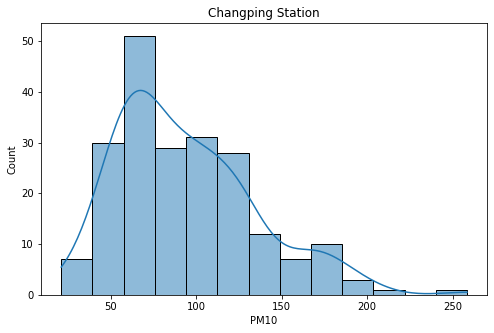

In [8]:
#histogram for Changping Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_chang_avg, x='PM10', kde=True)
plt.title("Changping Station");

Looking at the distribution can see that it is the same as daily average, right (positive) skewed the bulk being around 50 to 130; trailing to 250.

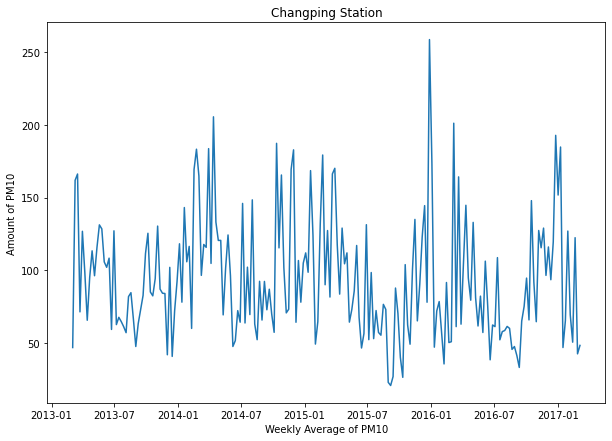

In [9]:
#lineplot for Changping Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_chang_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Weekly Average of PM10')
plt.title("Changping Station");

The weekly average follows the same observations as the daily average with:

- There are no obvious patterns in the PM10 timer series plot for any station.
- There does not appear to be a general trend increasing or decreasing.
- There may be some seasonal variation where it seems to be some spikes at the beginning of some years like 2016 and 2017. 

## Changping Station

In [10]:
# train-test split
pct_train = 0.80
cutoff = round(len(df_chang_avg) * pct_train)
train_chang, test_chang = df_chang_avg[:cutoff], df_chang_avg[cutoff:]

In [11]:
#stationarity test
#dickey-fuller test
from statsmodels.tsa.stattools import adfuller

#autolag set to AIC to minimize it
chang_dft = adfuller(train_chang['PM10'], autolag='AIC')
output_chang = pd.Series(chang_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_chang

test statistic             -2.952427
pvalue                      0.039582
number of lags used        11.000000
number of observations    156.000000
dtype: float64

p-value is under 0.05 which means that can proceed to modeling

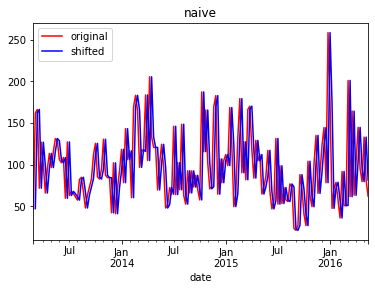

In [12]:
#baseline
base_chang = train_chang['PM10'].shift(1)

fig, ax = plt.subplots()

train_chang.PM10.plot(ax=ax, c='r', label='original')
base_chang.plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();


#tomorrow figure out how get only the last couple of dates in there (index it)

In [13]:
#first simple model Auto Regression
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'

In [14]:
from statsmodels.tsa.ar_model import AutoReg

ar_chang = AutoReg(train_chang['PM10'], lags=7).fit()


In [15]:
print(out.format(ar_chang.aic, ar_chang.hqic, ar_chang.bic))

AIC: 1652.226, HQIC: 1663.487, BIC: 1679.959


In [16]:
import pmdarima as pm

fit_wk = pm.auto_arima(train_chang.PM10, start_p=0, d=1, start_q=0, max_p=6, max_d=6, max_q=6, 
                             start_P=0, D=1, start_Q=0, max_P=6, max_D=6, max_Q=6, seasonal=True, m=52, trace=True,
                             error_action='ignore', suppress_warnings=True, stepwise=True)  

fit_wk.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=1324.343, Time=0.23 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=1274.448, Time=4.12 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=11.01 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=1298.102, Time=0.60 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=1275.001, Time=16.72 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=1274.998, Time=8.88 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=10.76 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=1277.006, Time=24.75 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=1302.288, Time=2.83 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=1268.726, Time=5.90 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=1291.582, Time=1.05 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=1268.731, Time=24.01 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=inf, Time=15.43 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=inf, Time=17.42 sec
 ARIMA(2,1,0)(2,1,1)[52]        

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  168
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood                -618.232
Date:                             Fri, 11 Nov 2022   AIC                           1242.464
Time:                                     16:49:06   BIC                           1250.699
Sample:                                 03-03-2013   HQIC                          1245.807
                                      - 05-15-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9500      0.037    -25.381      0.000      -1.023      -0.877
ar.S.L52      -0.5054      0.103     -4.917      0.000      -0.707      -0.304
sigma2      2347.6739    285.875      8.212      0.000    1787.369    2907.978
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                13.15
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                             0.62
Prob(H) (two-sided):                  0.16   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
# root mean square error 
from sklearn.metrics import mean_squared_error

print('Training RMSE: %.2f' % np.sqrt(mean_squared_error(train_chang.PM10, fit_wk.predict_in_sample())))
print('Testing RMSE: %.2f' % np.sqrt(mean_squared_error(test_chang.PM10, fit_wk.predict(n_periods=test_chang.shape[0]))))

Training RMSE: 49.64
Testing RMSE: 41.88


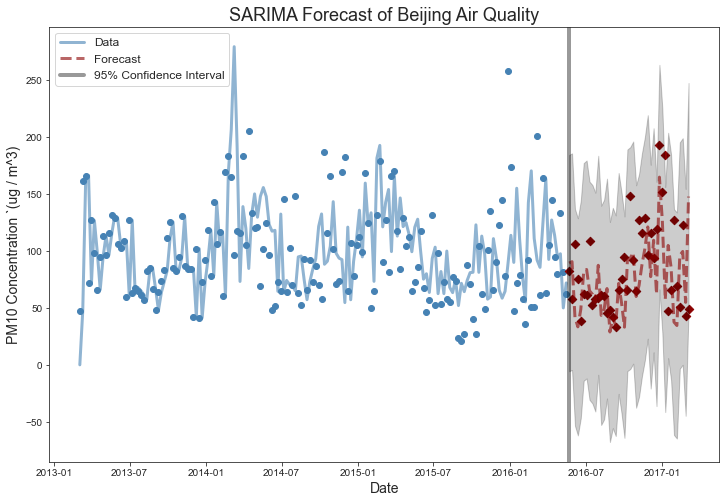

In [18]:
# prediction plot
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.set_style('ticks')

plt.scatter(train_chang.index, train_chang.PM10, color='steelblue', marker='o')
plt.plot(train_chang.index, fit_wk.predict_in_sample(), color='steelblue', linewidth=3, alpha=0.6)

fit_test, ci_test = fit_wk.predict(n_periods=test_chang.shape[0], return_conf_int=True)
ci_lower = pd.Series(ci_test[:, 0], index=test_chang.index)
ci_upper = pd.Series(ci_test[:, 1], index=test_chang.index)
plt.scatter(test_chang.index, test_chang.PM10, color='darkred', marker='D')
plt.plot(test_chang.index, fit_wk.predict(n_periods=test_chang.shape[0]), color='darkred', linestyle='--', linewidth=3, alpha=0.6)

plt.title('SARIMA Forecast of Beijing Air Quality', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 Concentration `(ug / m^3)', fontsize=14)
plt.axvline(x=df_chang_avg.PM10.index[cutoff], color='black', linewidth=4, alpha=0.4)
plt.fill_between(ci_lower.index, ci_lower, ci_upper, color='k', alpha=0.2)
plt.legend(('Data', 'Forecast', '95% Confidence Interval'), loc='best', prop={'size': 12})
plt.show();

## Dongsi Station

In [19]:
# train-test split
pct_train_d = 0.80
cutoff_d = round(len(df_dong_avg) * pct_train_d)
train_dong, test_dong = df_dong_avg[:cutoff_d], df_dong_avg[cutoff_d:]

In [20]:
#stationarity
#autolag set to AIC to minimize it
dong_dft = adfuller(train_dong['PM10'], autolag='AIC')
output_dong = pd.Series(dong_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_dong

test statistic             -4.616759
pvalue                      0.000120
number of lags used         3.000000
number of observations    164.000000
dtype: float64

p-value is under 0.05 which means that can proceed to modeling

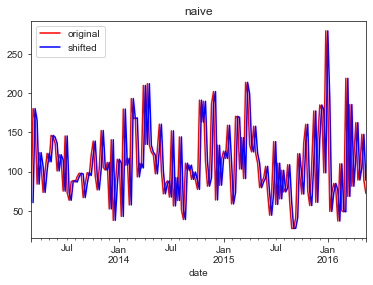

In [21]:
#baseline
base_dong = train_dong['PM10'].shift(1)

fig, ax = plt.subplots()

train_dong.PM10.plot(ax=ax, c='r', label='original')
base_dong.plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [22]:
#AR model
ar_dong = AutoReg(train_dong['PM10'], lags=7).fit()

print(out.format(ar_dong.aic, ar_dong.hqic, ar_dong.bic))

AIC: 1687.190, HQIC: 1698.450, BIC: 1714.922


## Guanyan Station

In [23]:
# train-test split
pct_train_gu = 0.80
cutoff_gu = round(len(df_guan_avg) * pct_train_gu)
train_guan, test_guan = df_guan_avg[:cutoff_gu], df_guan_avg[cutoff_gu:]

In [24]:
#stationarity
#autolag set to AIC to minimize it
guan_dft = adfuller(train_guan['PM10'], autolag='AIC')
output_guan = pd.Series(guan_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_guan

test statistic           -1.112074e+01
pvalue                    3.471107e-20
number of lags used       0.000000e+00
number of observations    1.670000e+02
dtype: float64

p-value is under 0.05 which means that can proceed to modeling

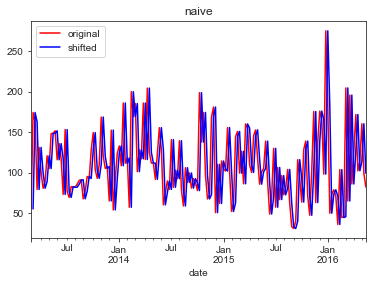

In [25]:
#baseline
base_guan = train_guan['PM10'].shift(1)

fig, ax = plt.subplots()

train_guan.PM10.plot(ax=ax, c='r', label='original')
base_guan.plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [26]:
#AR model
ar_guan = AutoReg(train_guan['PM10'], lags=7).fit()

print(out.format(ar_guan.aic, ar_guan.hqic, ar_guan.bic))

AIC: 1667.851, HQIC: 1679.112, BIC: 1695.584


## Gucheng Station

In [27]:
# train-test split
pct_train_guc = 0.80
cutoff_guc = round(len(df_guch_avg) * pct_train_guc)
train_guch, test_guch = df_guch_avg[:cutoff_guc], df_guan_avg[cutoff_guc:]

In [28]:
#stationarity
#autolag set to AIC to minimize it
guan_dft = adfuller(train_guan['PM10'], autolag='AIC')
output_guan = pd.Series(guan_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_guan

test statistic           -1.112074e+01
pvalue                    3.471107e-20
number of lags used       0.000000e+00
number of observations    1.670000e+02
dtype: float64

p-value is under 0.05 which means that can proceed to modeling

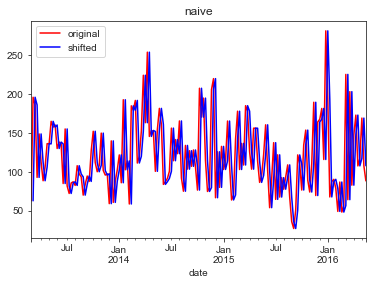

In [29]:
#baseline
base_guch = train_guch['PM10'].shift(1)

fig, ax = plt.subplots()

train_guch.PM10.plot(ax=ax, c='r', label='original')
base_guch.plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [30]:
#AR model
ar_guch = AutoReg(train_guch['PM10'], lags=7).fit()

print(out.format(ar_guch.aic, ar_guch.hqic, ar_guch.bic))

AIC: 1684.244, HQIC: 1695.504, BIC: 1711.976


## Huairou Station

In [31]:
# train-test split
pct_train_h = 0.80
cutoff_h = round(len(df_huai_avg) * pct_train_h)
train_huai, test_huai = df_huai_avg[:cutoff_h], df_huai_avg[cutoff_h:]

In [32]:
#stationarity
#autolag set to AIC to minimize it
huai_dft = adfuller(train_huai['PM10'], autolag='AIC')
output_huai = pd.Series(huai_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_huai

test statistic           -1.071993e+01
pvalue                    3.169995e-19
number of lags used       0.000000e+00
number of observations    1.670000e+02
dtype: float64

p-value is under 0.05 which means that can proceed to modeling

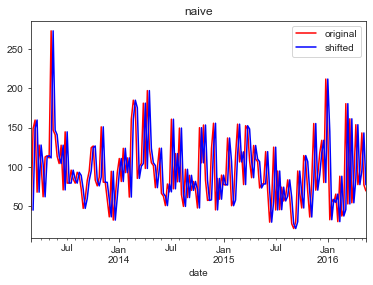

In [33]:
#baseline
base_huai = train_huai['PM10'].shift(1)

fig, ax = plt.subplots()

train_huai.PM10.plot(ax=ax, c='r', label='original')
base_huai.plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [34]:
#AR model
ar_huai = AutoReg(train_huai['PM10'], lags=7).fit()

print(out.format(ar_huai.aic, ar_huai.hqic, ar_huai.bic))

AIC: 1654.707, HQIC: 1665.967, BIC: 1682.439


## Nongzhanguan Station

In [35]:
# train-test split
pct_train_n = 0.80
cutoff_n = round(len(df_nong_avg) * pct_train_n)
train_nong, test_nong = df_nong_avg[:cutoff_n], df_nong_avg[cutoff_n:]

In [36]:
#stationarity
#autolag set to AIC to minimize it
nong_dft = adfuller(train_nong['PM10'], autolag='AIC')
output_nong = pd.Series(nong_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_nong

test statistic             -4.422150
pvalue                      0.000271
number of lags used         3.000000
number of observations    164.000000
dtype: float64

p-value is under 0.05 which means that can proceed to modeling

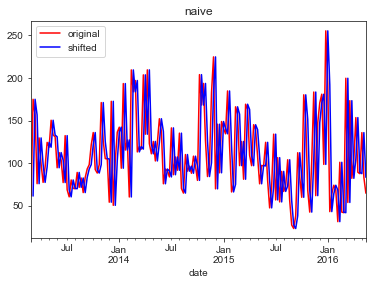

In [37]:
#baseline
base_nong = train_nong['PM10'].shift(1)

fig, ax = plt.subplots()

train_nong.PM10.plot(ax=ax, c='r', label='original')
base_nong.plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [38]:
#AR model
ar_nong = AutoReg(train_nong['PM10'], lags=7).fit()

print(out.format(ar_nong.aic, ar_nong.hqic, ar_nong.bic))

AIC: 1682.778, HQIC: 1694.039, BIC: 1710.511


## Shunyi Station

In [39]:
# train-test split
pct_train_s = 0.80
cutoff_s = round(len(df_shun_avg) * pct_train_s)
train_shun, test_shun = df_shun_avg[:cutoff_s], df_shun_avg[cutoff_s:]

In [40]:
#stationarity
#autolag set to AIC to minimize it
shun_dft = adfuller(train_shun['PM10'], autolag='AIC')
output_shun = pd.Series(shun_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_shun

test statistic           -1.058256e+01
pvalue                    6.845695e-19
number of lags used       0.000000e+00
number of observations    1.670000e+02
dtype: float64

p-value is under 0.05 which means that can proceed to modeling

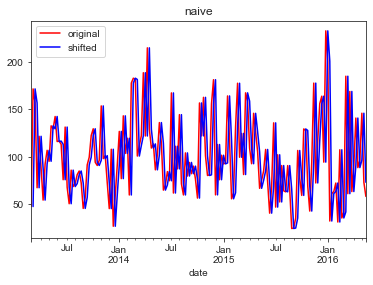

In [41]:
#baseline
base_shun = train_shun['PM10'].shift(1)

fig, ax = plt.subplots()

train_shun.PM10.plot(ax=ax, c='r', label='original')
base_shun.plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [42]:
#AR model
ar_shun = AutoReg(train_shun['PM10'], lags=7).fit()

print(out.format(ar_shun.aic, ar_shun.hqic, ar_shun.bic))

AIC: 1658.123, HQIC: 1669.384, BIC: 1685.856


## Tiantan Station

In [43]:
# train-test split
pct_train_t = 0.80
cutoff_t = round(len(df_tian_avg) * pct_train_t)
train_tian, test_tian = df_tian_avg[:cutoff_t], df_tian_avg[cutoff_t:]

In [44]:
#stationarity
#autolag set to AIC to minimize it
tian_dft = adfuller(train_tian['PM10'], autolag='AIC')
output_tian = pd.Series(tian_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_tian

test statistic           -1.102707e+01
pvalue                    5.792208e-20
number of lags used       0.000000e+00
number of observations    1.670000e+02
dtype: float64

p-value is under 0.05 which means that can proceed to modeling

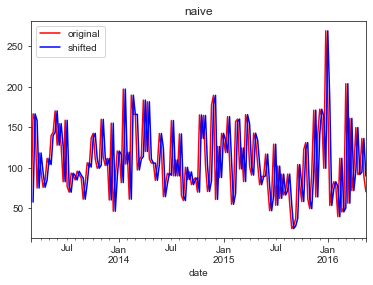

In [45]:
#baseline
base_tian = train_tian['PM10'].shift(1)

fig, ax = plt.subplots()

train_tian.PM10.plot(ax=ax, c='r', label='original')
base_tian.plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [46]:
#AR model
ar_tian = AutoReg(train_tian['PM10'], lags=7).fit()

print(out.format(ar_tian.aic, ar_tian.hqic, ar_tian.bic))

AIC: 1658.182, HQIC: 1669.442, BIC: 1685.915


## Wanliu Station

In [47]:
# train-test split
pct_train_w = 0.80
cutoff_w = round(len(df_wanl_avg) * pct_train_w)
train_wanl, test_wanl = df_wanl_avg[:cutoff_w], df_wanl_avg[cutoff_w:]

In [48]:
#stationarity
#autolag set to AIC to minimize it
wanl_dft = adfuller(train_wanl['PM10'], autolag='AIC')
output_wanl = pd.Series(wanl_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_wanl

test statistic             -4.409844
pvalue                      0.000285
number of lags used         3.000000
number of observations    164.000000
dtype: float64

p-value is under 0.05 which means that can proceed to modeling

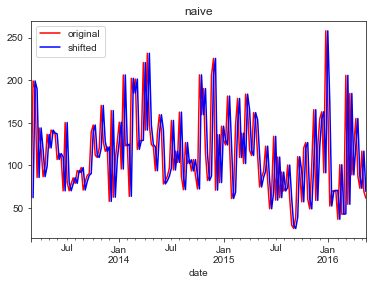

In [49]:
#baseline
base_wanl = train_wanl['PM10'].shift(1)

fig, ax = plt.subplots()

train_wanl.PM10.plot(ax=ax, c='r', label='original')
base_wanl.plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [50]:
#AR model
ar_wanl = AutoReg(train_wanl['PM10'], lags=7).fit()

print(out.format(ar_wanl.aic, ar_wanl.hqic, ar_wanl.bic))

AIC: 1680.270, HQIC: 1691.530, BIC: 1708.002


## Conclusion 

I tried the SARIMA model on one of the stations, Changping, and found that the AIC Score significantly improved from 1684.244 in the AutoReg model to 1242.464. Doing the SARIMA model to minimize the AIC score will take a while to do for all stations. Therefore, the final models will be done with a weekly average resample and with 3 to 4 stations based on proximity to the city center of Beijing.